In [1]:
import sys
print(f"Using Python Version: {(sys.version).split()[0]}")

Using Python Version: 3.13.5


We'll need some special functions:

In [2]:
from math import cos, sin, pi

Import plotting (note the commented-out command to install, if not already available. Need to restart the kernel after install)

In [3]:
import matplotlib.pyplot as plt
from collections.abc import Callable
import numpy as np

Just for illustration, plot the test function (Note: whether you use cos(x) - x or x - cos(x) makes no difference for the methods below)



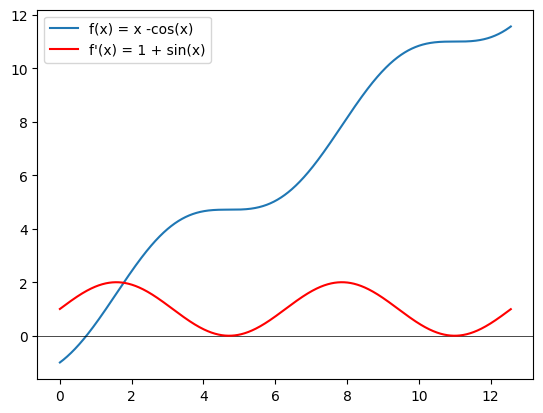

In [4]:
x = np.arange(0, 4*pi, .01)
y = x - np.cos(x)
plt.plot(x, y, label='f(x) = x -cos(x)')
plt.axhline(0, color='black', lw=0.5)
plt.plot(x, 1+np.sin(x), color='red', label='f\'(x) = 1 + sin(x)')
plt.legend()

# Problem 1

In [5]:
def bisection(func: Callable[[float],float], ab: list[float], eps: float = 1.e-08, N_max: int = 500) -> list[float]:
    """Performs bisection 

    Arguments:
      func: the function for which is root is to be found
      ab: list of the form [a,b], the initial interval in which a root lies
      eps: convergence tolerance for the smallest interval size
      N_max: maximum iterations

    Returns:
      Convergence history of the root finding process

    Raises:
      ValueError: if the initial interval does not satisfy f(a)f(b) < 0
      RuntimeError: if the maximum number of iterations is reached
    """

    a = ab[0]
    b = ab[1]
    f_a = func(a)

    conv_history = []
    
    if np.sign(f_a)*np.sign(func(b)) > 0:
        raise ValueError(
            "Initial Inverval [a,b] must be such that f(a)f(b) < 0")

    for n in range(N_max):
        p = a + 0.5*(b-a)
        print(f"{n}, {p}")
        f_p = func(p)

        conv_history.append(p)

        if 0.5*(b-a) < eps or abs(f_p) < eps:
            return conv_history

        if np.sign(f_a)*np.sign(f_p) > 0:
            f_a = f_p
            a = p
        else:
            b = p

    raise RuntimeError(f"Reached maximum iteration {N_max = }")
    

In [6]:
p_b = bisection(lambda x: cos(x) - x, [0, 1.2])

0, 0.6
1, 0.8999999999999999
2, 0.75
3, 0.675
4, 0.7125
5, 0.73125
6, 0.740625
7, 0.7359374999999999
8, 0.73828125
9, 0.739453125
10, 0.7388671875
11, 0.7391601562500001
12, 0.739013671875
13, 0.7390869140625
14, 0.73905029296875
15, 0.7390686035156251
16, 0.7390777587890626
17, 0.7390823364257812
18, 0.7390846252441406
19, 0.7390857696533204
20, 0.7390851974487305
21, 0.7390849113464355
22, 0.739085054397583
23, 0.7390851259231568
24, 0.7390851616859436
25, 0.7390851438045503
26, 0.7390851348638535


In [7]:
p_exact = 0.73908513321516064
print("Error in bisection:", abs(p_b[-1] - p_exact))

Error in bisection: 1.648692848910116e-09


In [8]:
print(f"Theoretical number of steps: {(8 + np.log10(1.2))/np.log10(2)}")

Theoretical number of steps: 26.838459164932694


Note: the theoretical estimate for the number of steps needed is consistent with the number of iterations we observe. (We do 27 steps p_0 ... p_26. Note that my counter starts at zero.) We need to be careful when plotting: The formula derived in class assumes that iterations start at "1" --> shift index!

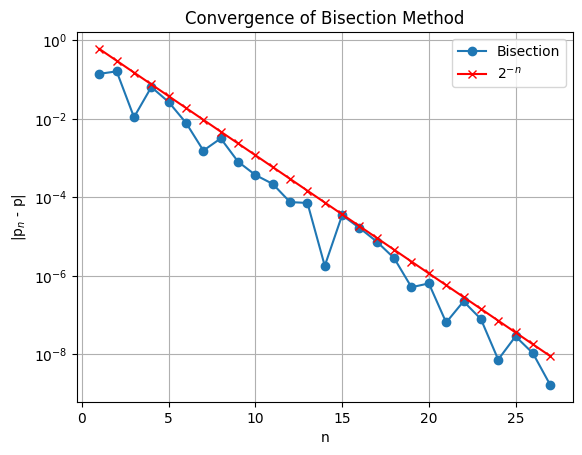

In [9]:
n = range(1,len(p_b)+1)
plt.semilogy(n, np.abs(np.array(p_b) - p_exact), 'o-',n ,[2**(-x)*1.2 for x in n] , 'r-x')
plt.xlabel("n")
plt.ylabel(f"|p$_n$ - p|")
plt.title("Convergence of Bisection Method")
plt.legend(["Bisection", "2$^{-n}$"])
plt.grid()
plt.show()

We observe that the error reduction is not monotone for the bisection method. The error bound is very tight (compare to fixed-point iteration below)!

# Problem 2

To show that $cos(x) -x$ has a unique fixed point in $[0,1.2]$ it is sufficent to note that: 
  1. $cos(0)=1, cos(1.2) > 0$ (see output below) and $cos(x)$ is monotonically decreasing on [0,1.2]. The interval is thus mapped onto itself. 
  2. $|cos'(x)| = |sin(x)|$ is  monotonically increasing on [0,1.2] with $sin(0) = 0$ and $sin(1.2) < 1 $(see output below). Therefore $|cos'(x)| < 1$ for all $x \in [0,1.2]$

In [10]:
print(f"{cos(1.2) = }, {sin(1.2) = }")

cos(1.2) = 0.3623577544766736, sin(1.2) = 0.9320390859672263


# Fixed-Point Iteration

In [11]:
def fixed_point(func: Callable[[float],float], x: float, eps: float = 1.e-08, N_max: int = 100) -> list[float]:
    """fixed-point iteration for scalar function

    Arguments:
      func: The function for which the fixed-point is to be found
      x: initial guess 
      eps: convergence tolerance (default 1.0e-08)
      N_max: maximum number of iterations (default 100)

    Returns:
      conv_history: convergence history of the fixed-point iteration
    """

    f_val = func(x)
    counter = 0
    conv_history = [x]

    print(f"{counter:4d} {x:.6e} {abs(f_val):.6e}")

    delta = f_val -x
    
    while abs(delta) > eps:

        x = f_val
        f_val = func(x)
        delta = f_val-x
        conv_history.append(x)

        counter += 1
        print(f"{counter:4d} {x:.6e} {abs(f_val-x):.6e}")

        if counter >= N_max:
            raise RuntimeError(f"Failed to converge after {N_max} iterations")

    return conv_history

In [12]:
try:
    conv_history_fp = fixed_point(func=lambda x: cos(x), x=1.2)
except RuntimeError as e:
    print(f"Runtime Error: {e}")

   0 1.200000e+00 3.623578e-01
   1 3.623578e-01 5.727059e-01
   2 9.350636e-01 3.412964e-01
   3 5.937672e-01 2.350716e-01
   4 8.288389e-01 1.531067e-01
   5 6.757321e-01 1.045171e-01
   6 7.802492e-01 6.951098e-02
   7 7.107382e-01 4.714222e-02
   8 7.578805e-01 3.158588e-02
   9 7.262946e-01 2.134573e-02
  10 7.476403e-01 1.434503e-02
  11 7.332953e-01 9.677552e-03
  12 7.429728e-01 6.512084e-03
  13 7.364608e-01 4.389650e-03
  14 7.408504e-01 2.955525e-03
  15 7.378949e-01 1.991504e-03
  16 7.398864e-01 1.341215e-03
  17 7.385452e-01 9.035877e-04
  18 7.394488e-01 6.086087e-04
  19 7.388401e-01 4.099928e-04
  20 7.392501e-01 2.761640e-04
  21 7.389740e-01 1.860329e-04
  22 7.391600e-01 1.253115e-04
  23 7.390347e-01 8.441245e-05
  24 7.391191e-01 5.686073e-05
  25 7.390622e-01 3.830230e-05
  26 7.391005e-01 2.580079e-05
  27 7.390747e-01 1.737977e-05
  28 7.390921e-01 1.170720e-05
  29 7.390804e-01 7.886120e-06
  30 7.390883e-01 5.312181e-06
  31 7.390830e-01 3.578351e-06
  32 7.3

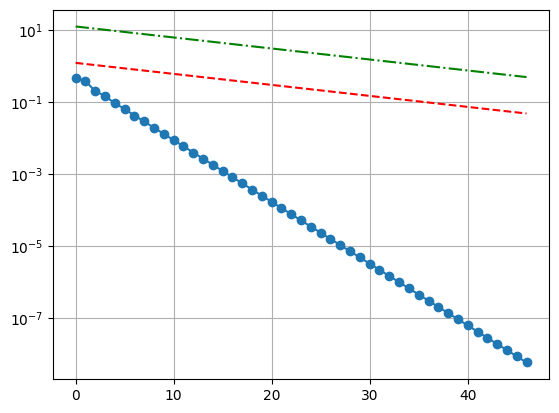

In [13]:
n=range(len(conv_history_fp))
plt.semilogy(n, np.abs(np.array(conv_history_fp) - p_exact), 'o-', 
             n, [1.2*sin(1.2)**x for x in n], 'r--',
             n, [sin(1.2)**x/(1-sin(1.2))*np.abs(conv_history_fp[1]-conv_history_fp[0]) for x in n], 'g-.')
plt.grid()


We can see that the estimates are quite pessimistic, although they are correct upper bounds. A better a posteriori estimate can be dervied as $|p_n - p| \leq L/(1-L) |p_n - p_{n-1}|$

# Secant Iteration

In [14]:
def secant(func: Callable[[float],float], x: float, eps: float = 1.0e-10, N_max = 100) -> list[float]:
    """
    Secant method for scalar function

    Arguments:
        func: The function for which the root is to be found
        fprime: The derivative of the function
        x: initial guess
        eps: convergence tolerance (default 1.0e-10)
        N_max: maximum number of iterations (default 100)

    Returns:
        conv_history: convergence history of the root approximation
    """

    f_val = func(x)
    der_eps = 1.e-06
    f_der = (func(x + der_eps) - f_val) / der_eps
    counter = 0

    print(f"{counter:4d} {x:.6e} {abs(f_val):.6e}")

    conv_history = [x]

    while abs(f_val) > eps:

        if abs(f_der) < 1.e-12:
            raise ValueError(f"Detected zero derivative ({x = :.6e}) f'(x) = {f_der:.6e})")
        
        x_save = x
        x -= f_val / f_der

        f_save = f_val
        f_val = func(x)
        
        if (abs(x - x_save) < 1.e-12):
            raise ValueError(f"Detected zero denominator {x -x_save = :.6e})")

        f_der = (f_val - f_save) / (x - x_save)

        conv_history.append(x)

        counter += 1
        print(f"{counter:4d} {x:.6e} {abs(f_val):.6e}")
        
        if counter >= N_max:
            raise RuntimeError(f"Newton iteration failed to converge after {N_max} iterations")


    return conv_history

In [15]:
try:
    conv_history_secant = secant(func=lambda x: x - cos(x), x=1.2)
except RuntimeError as e:
    print(f"Runtime Error: {e}")
except ValueError as e:
    print(f"Value Error: {e}")

   0 1.200000e+00 8.376422e-01
   1 7.664466e-01 4.606678e-02
   2 7.412154e-01 3.566851e-03
   3 7.390978e-01 2.120788e-05
   4 7.390851e-01 9.964226e-09
   5 7.390851e-01 2.786660e-14


# Newton Iteration

In [16]:
def newton(
    func: Callable[[float],float], fprime: Callable[[float],float], x: float, eps: float = 1.0e-10, N_max = 100
) -> list[float]:
    """
    Newton-Raphson method for scalar function

    Arguments:
        func: The function for which the root is to be found
        fprime: The derivative of the function
        x: initial guess
        eps: convergence tolerance (default 1.0e-10)
        N_max: maximum number of iterations (default 100)

    Returns:
        conv_history: convergence history of the root approximation
    """

    f_val = func(x)
    f_der = fprime(x)
    counter = 0

    print(f"{counter:4d} {x:.6e} {abs(f_val):.6e}")

    conv_history = [x]

    while abs(f_val) > eps:

        if abs(f_der) < 1.e-12:
            raise ValueError(f"Detected zero derivative (x = {x:.6e}) f'(x) = {f_der:.6e})")
        
        x -= f_val / f_der
        f_val = func(x)
        f_der = fprime(x)

        conv_history.append(x)

        counter += 1
        print(f"{counter:4d} {x:.6e} {abs(f_val):.6e}")
        
        if counter >= N_max:
            raise RuntimeError(f"Newton iteration failed to converge after {N_max} iterations")

    return conv_history

We can now call the Newton Routine with a lambda:

In [17]:
try:
    conv_history_newton = newton(func=lambda x: x - cos(x), fprime=lambda x: 1 + sin(x), x=1.2)
except RuntimeError as e:
    print(f"Runtime Error: {e}")
except ValueError as e:
    print(f"Value Error: {e}")

   0 1.200000e+00 8.376422e-01
   1 7.664465e-01 4.606671e-02
   2 7.392457e-01 2.688083e-04
   3 7.390851e-01 9.530950e-09
   4 7.390851e-01 0.000000e+00


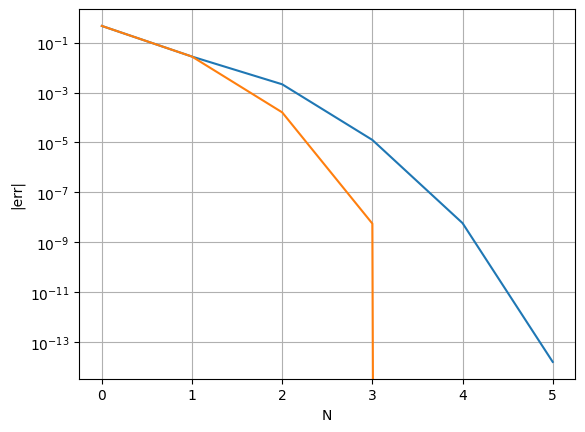

In [18]:
N_secant = range(len(conv_history_secant))
N_newton = range(len(conv_history_newton))

plt.semilogy(N_secant,[abs(x-p_exact) for x in conv_history_secant],N_newton, [abs(x-p_exact) for x in conv_history_newton])
plt.xlabel('N')
plt.ylabel('|err|')
plt.grid()